This notebook is for visualizing the new TF-Modisco results for ZF5 from CTCF.

In [1]:
# Import necessary dependencies

%matplotlib inline
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


2.7.15 |Anaconda custom (64-bit)| (default, Dec 14 2018, 19:04:19) 
[GCC 7.3.0]


Save and print the results.

Metaclusters heatmap


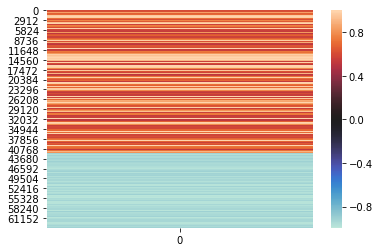

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 2694
Task 0 hypothetical scores:


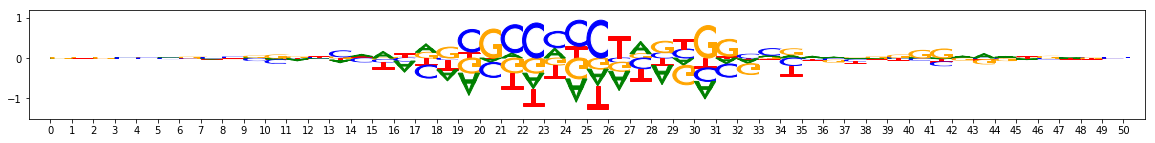

Task 0 actual importance scores:


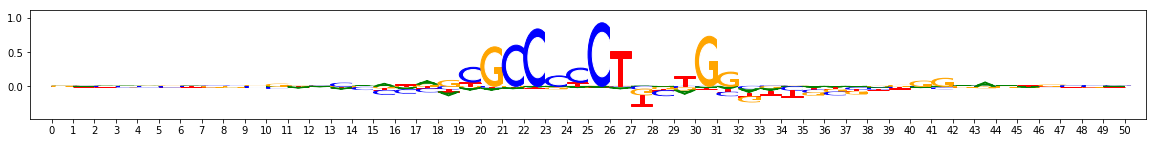

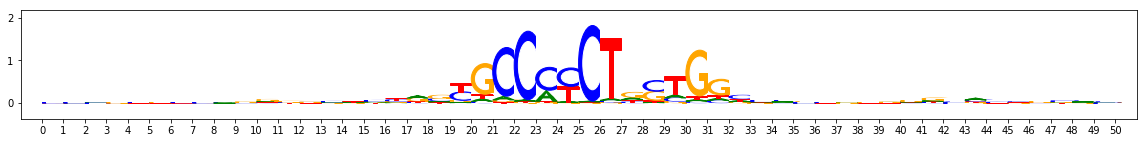

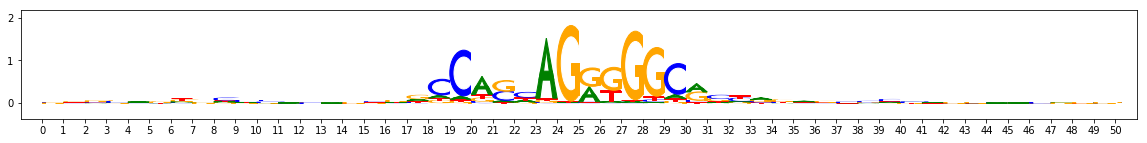

metacluster_0 pattern_1
total seqlets: 160
Task 0 hypothetical scores:


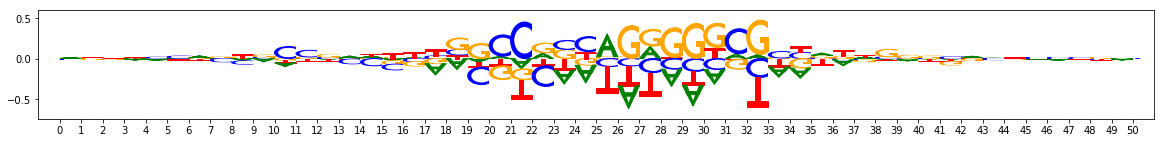

Task 0 actual importance scores:


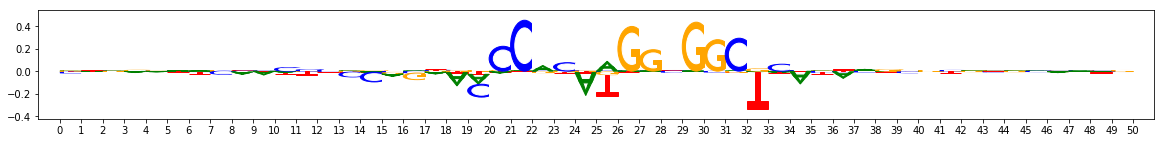

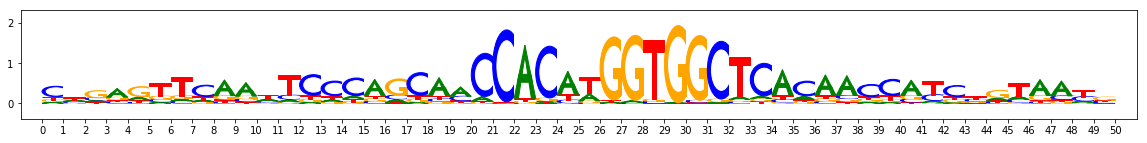

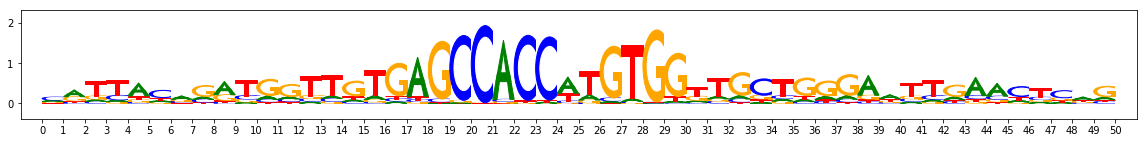

metacluster_0 pattern_2
total seqlets: 103
Task 0 hypothetical scores:


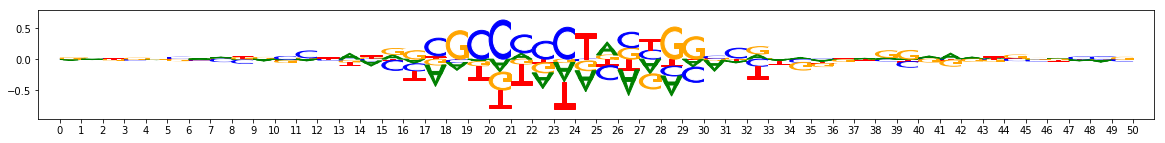

Task 0 actual importance scores:


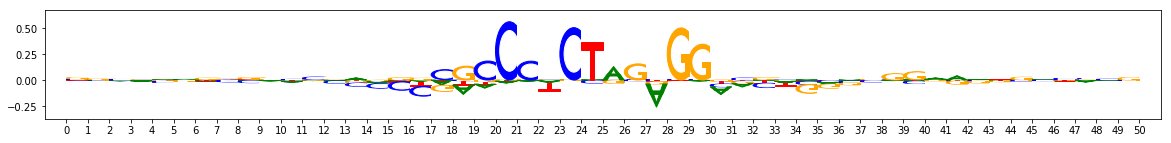

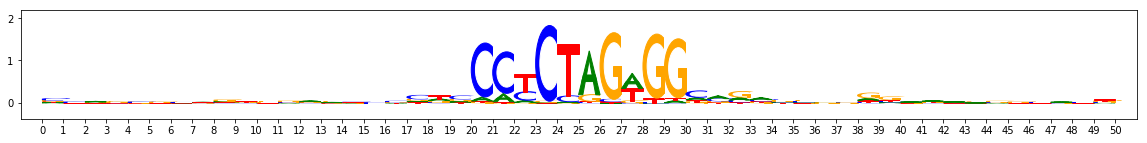

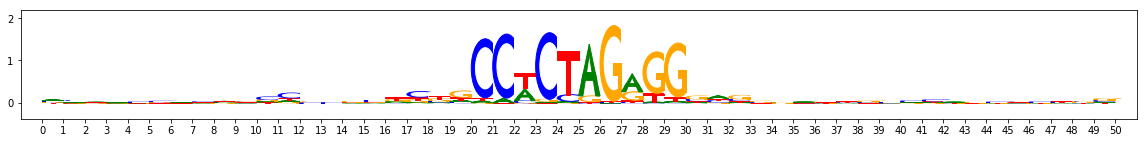

metacluster_0 pattern_3
total seqlets: 91
Task 0 hypothetical scores:


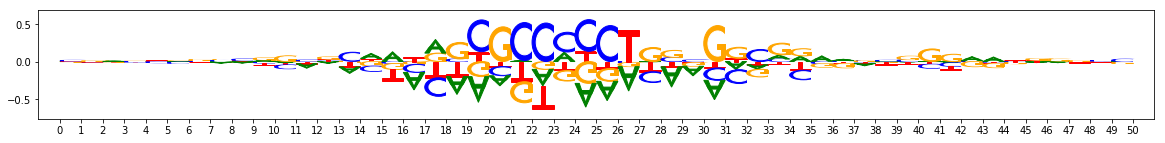

Task 0 actual importance scores:


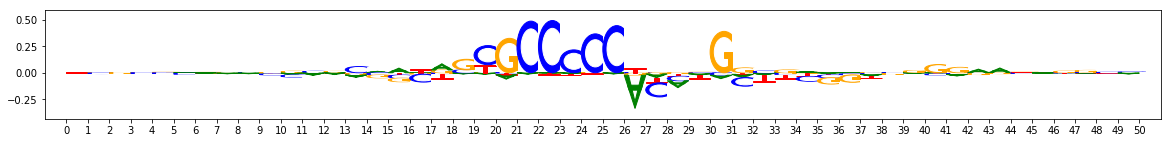

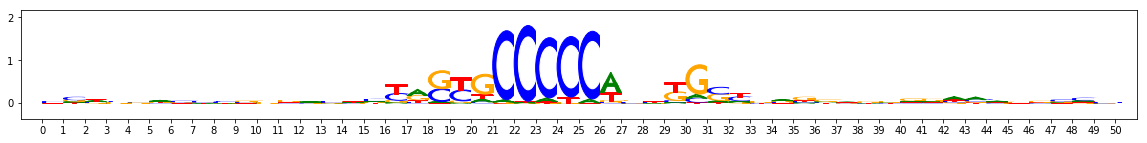

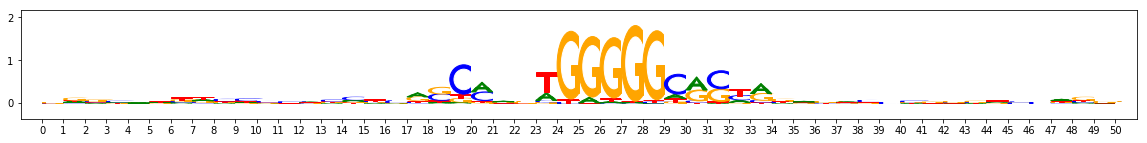

metacluster_0 pattern_4
total seqlets: 84
Task 0 hypothetical scores:


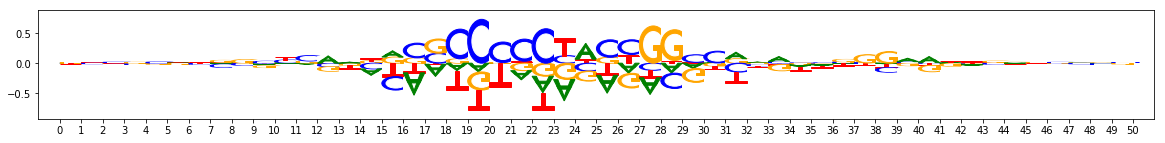

Task 0 actual importance scores:


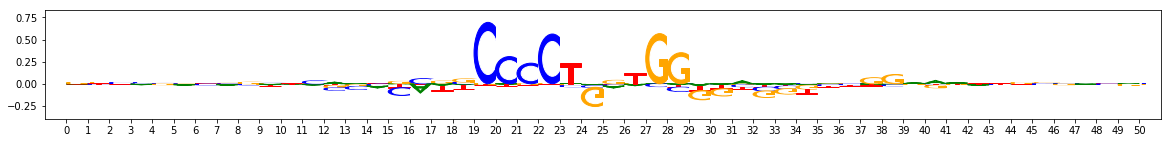

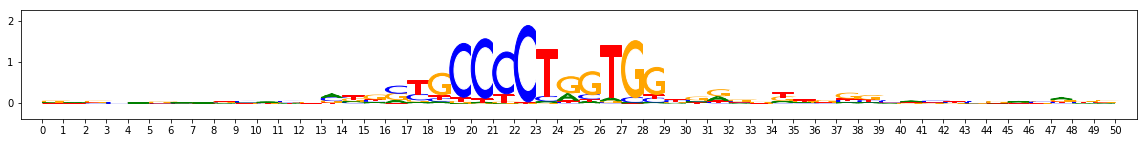

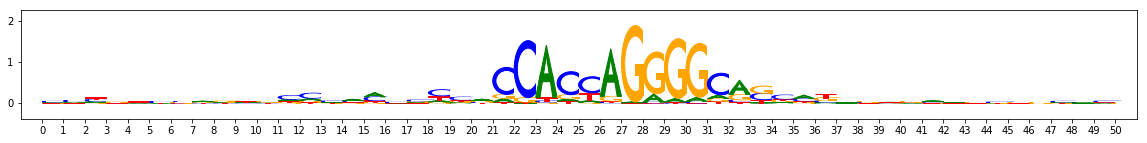

metacluster_0 pattern_5
total seqlets: 75
Task 0 hypothetical scores:


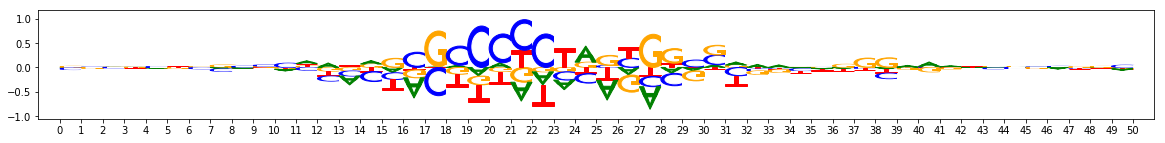

Task 0 actual importance scores:


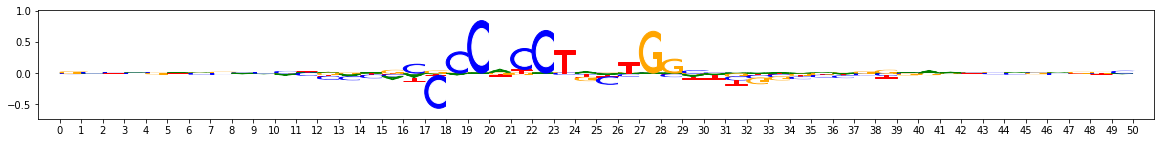

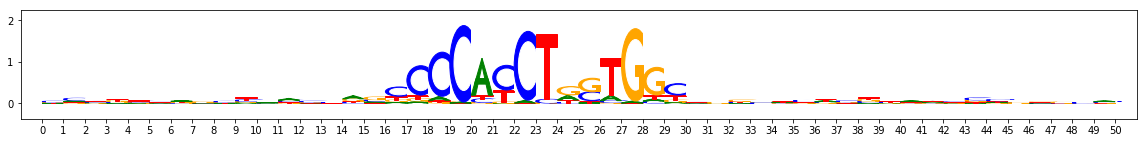

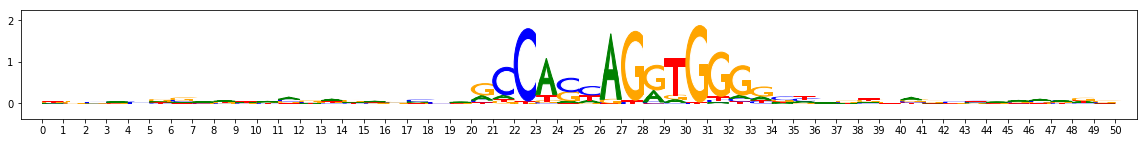

metacluster_0 pattern_6
total seqlets: 76
Task 0 hypothetical scores:


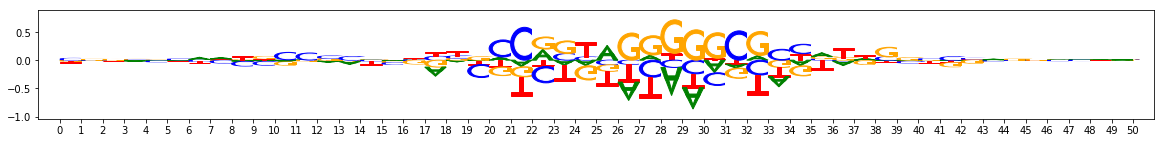

Task 0 actual importance scores:


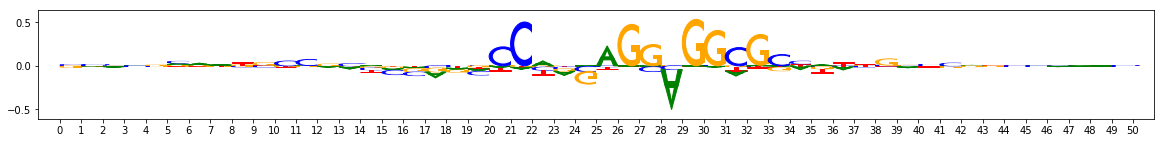

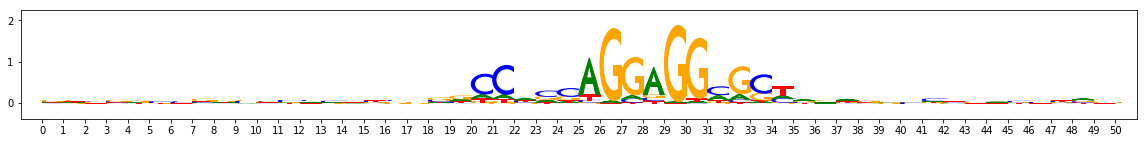

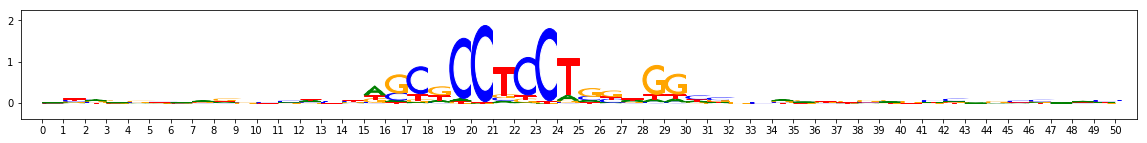

metacluster_0 pattern_7
total seqlets: 64
Task 0 hypothetical scores:


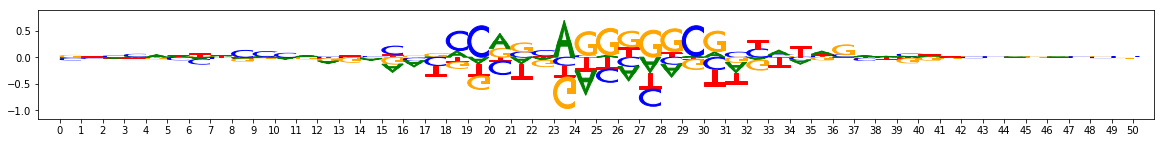

Task 0 actual importance scores:


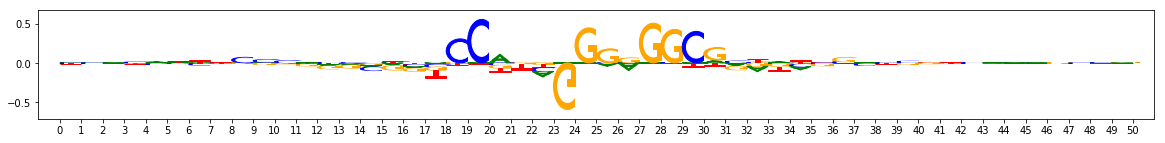

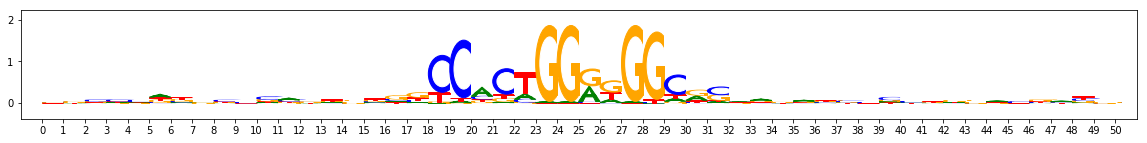

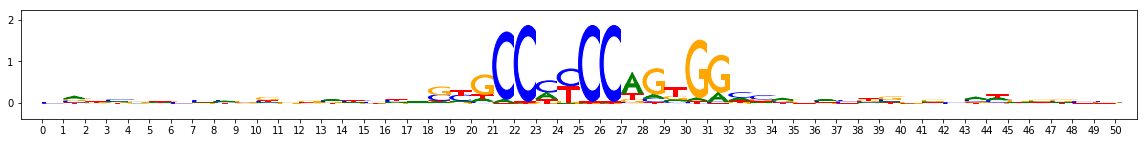

metacluster_0 pattern_8
total seqlets: 24
Task 0 hypothetical scores:


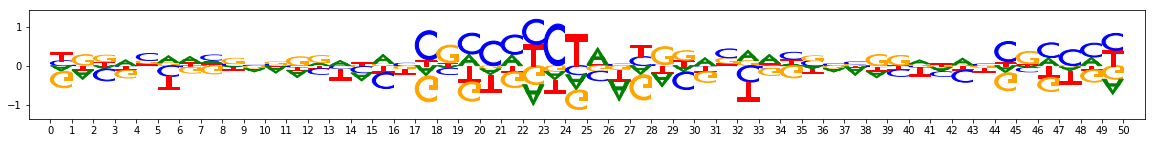

Task 0 actual importance scores:


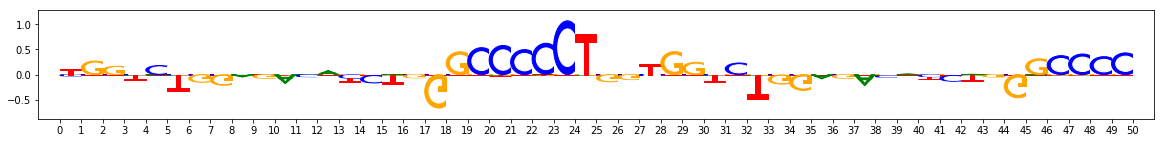

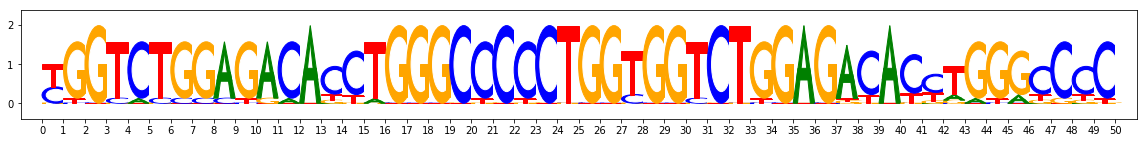

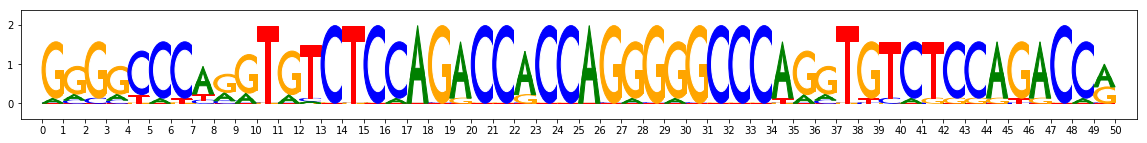

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 936
Task 0 hypothetical scores:


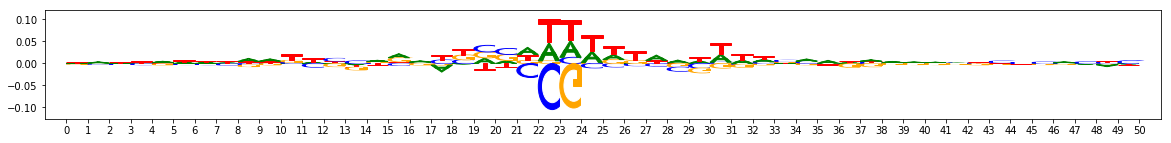

Task 0 actual importance scores:


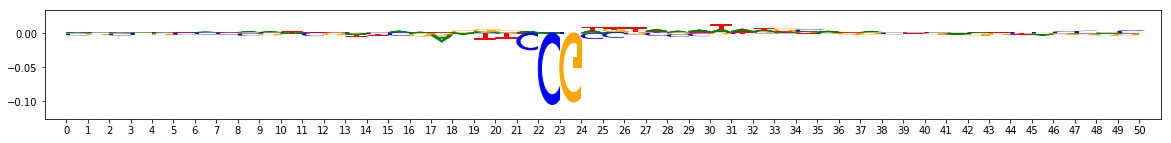

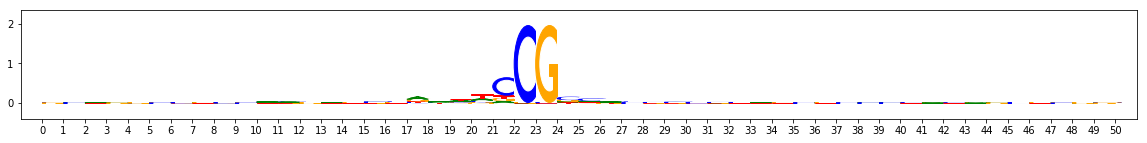

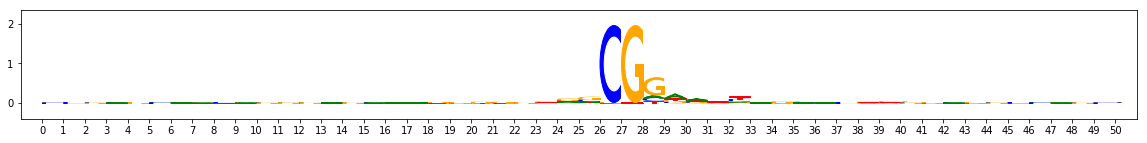

metacluster_1 pattern_1
total seqlets: 595
Task 0 hypothetical scores:


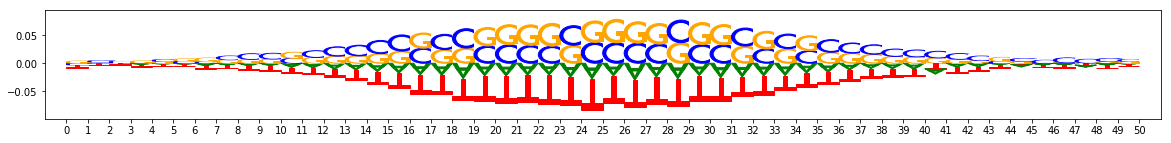

Task 0 actual importance scores:


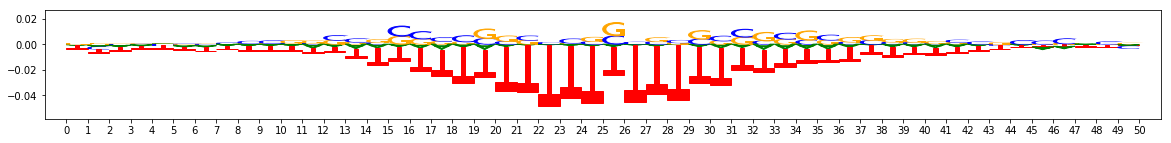

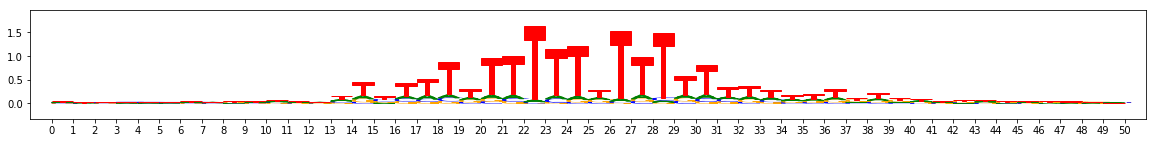

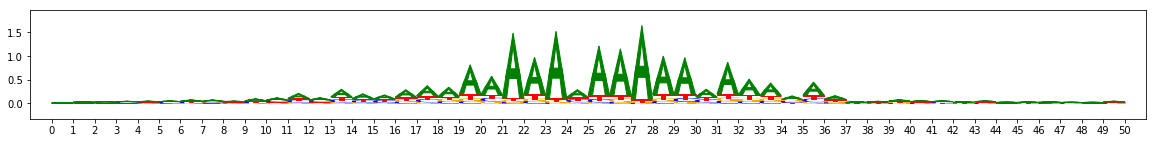

metacluster_1 pattern_2
total seqlets: 335
Task 0 hypothetical scores:


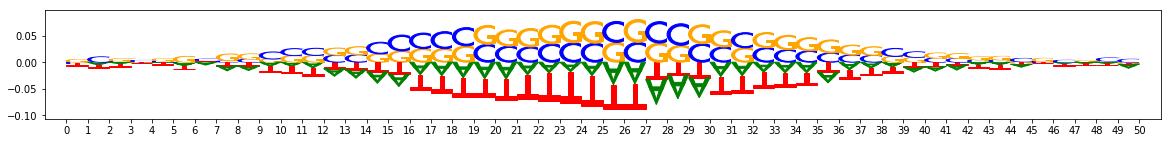

Task 0 actual importance scores:


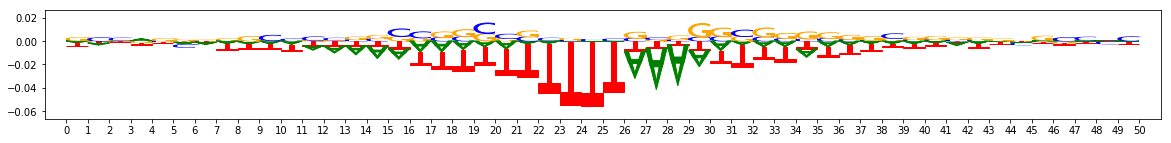

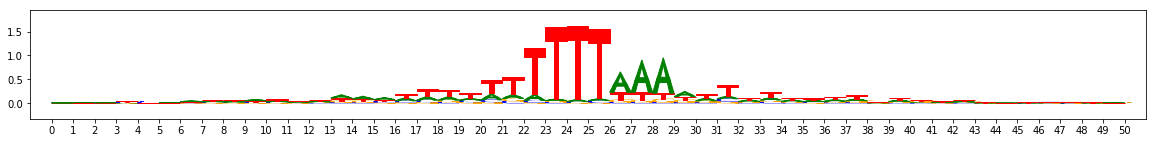

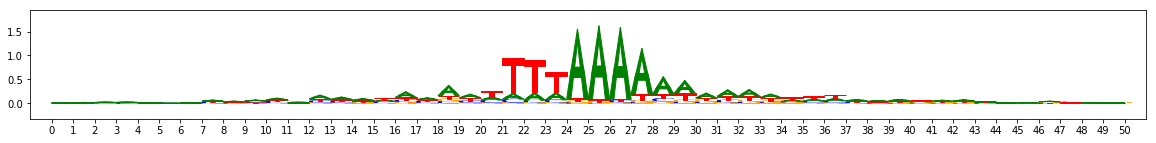

metacluster_1 pattern_3
total seqlets: 291
Task 0 hypothetical scores:


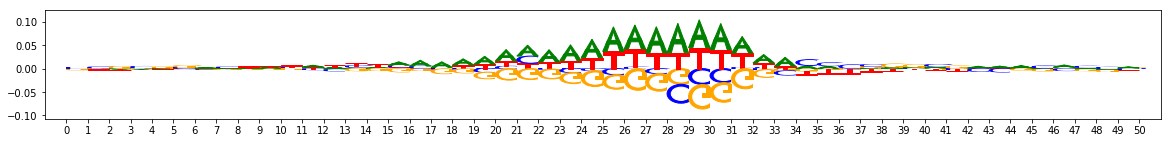

Task 0 actual importance scores:


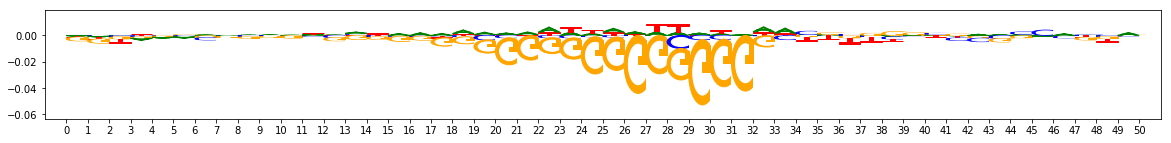

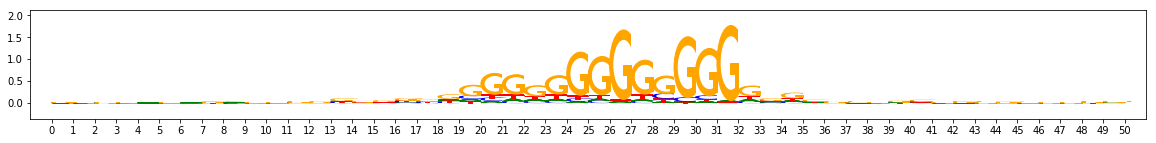

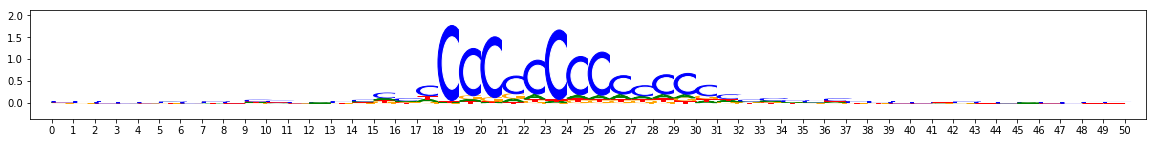

metacluster_1 pattern_4
total seqlets: 145
Task 0 hypothetical scores:


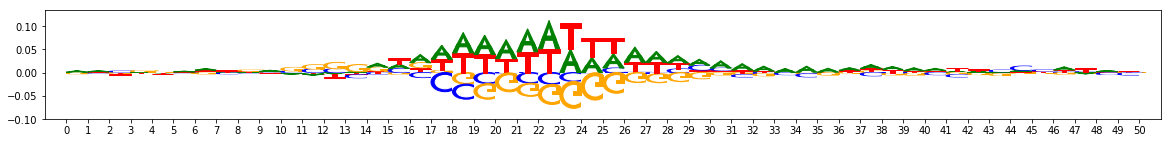

Task 0 actual importance scores:


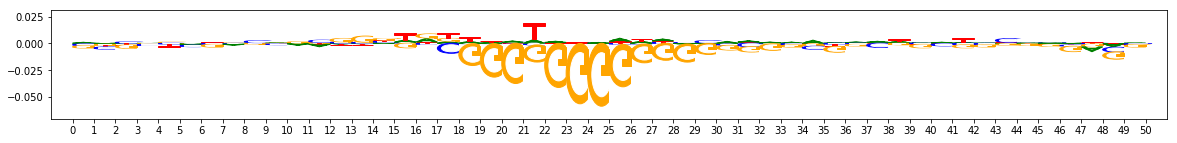

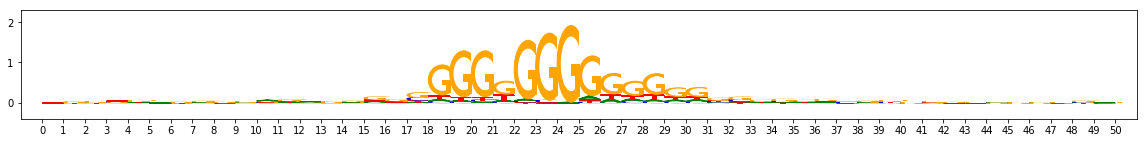

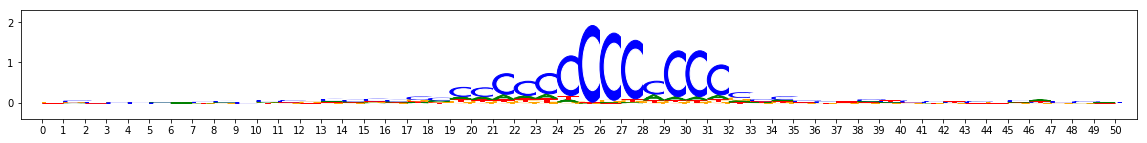

metacluster_1 pattern_5
total seqlets: 121
Task 0 hypothetical scores:


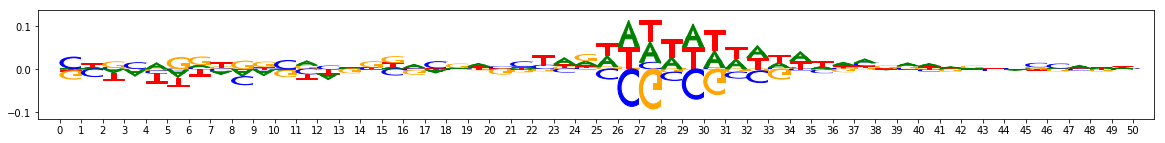

Task 0 actual importance scores:


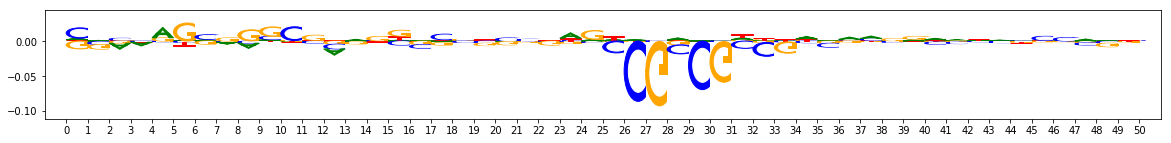

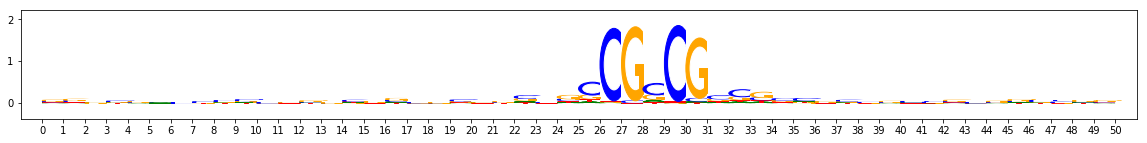

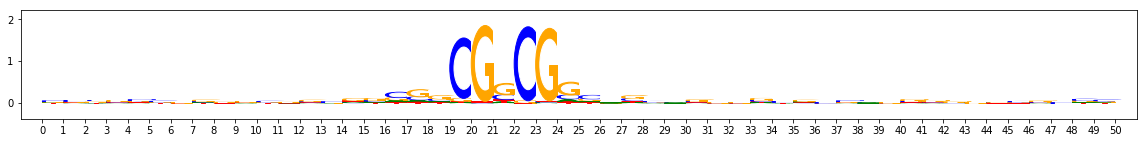

metacluster_1 pattern_6
total seqlets: 88
Task 0 hypothetical scores:


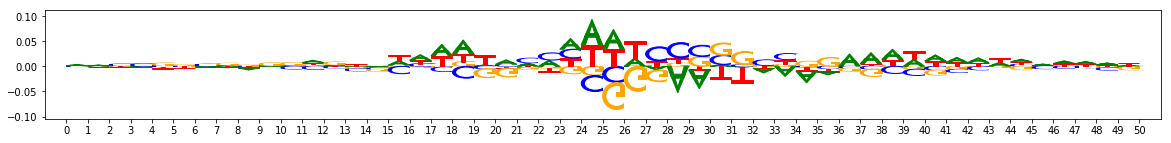

Task 0 actual importance scores:


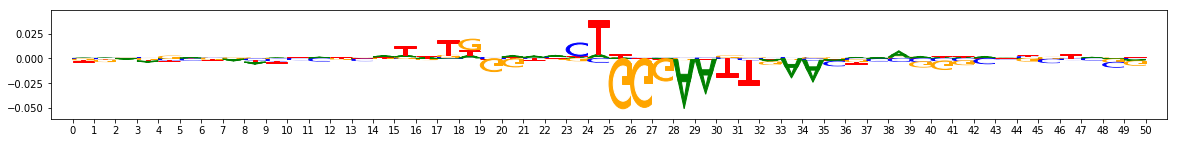

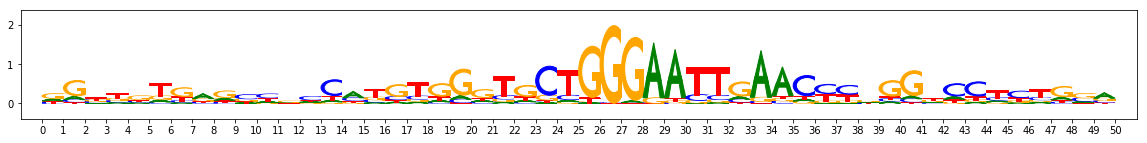

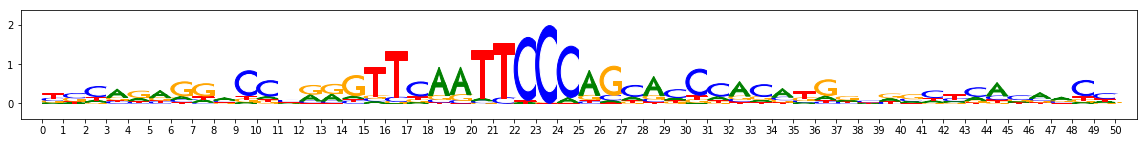

metacluster_1 pattern_7
total seqlets: 72
Task 0 hypothetical scores:


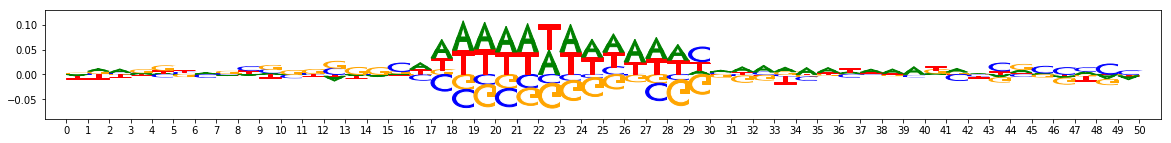

Task 0 actual importance scores:


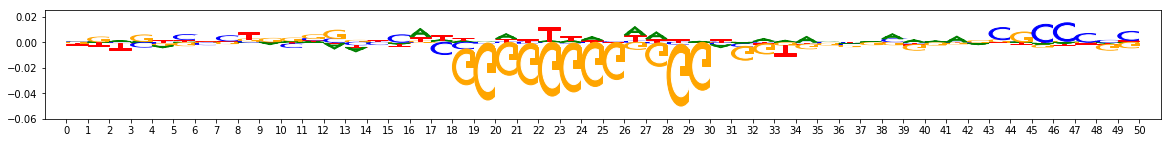

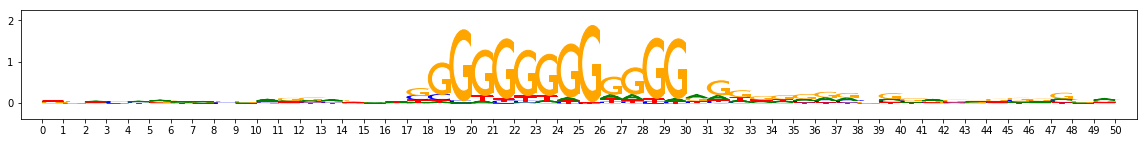

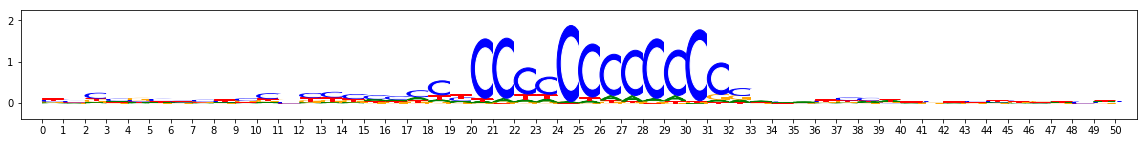

metacluster_1 pattern_8
total seqlets: 50
Task 0 hypothetical scores:


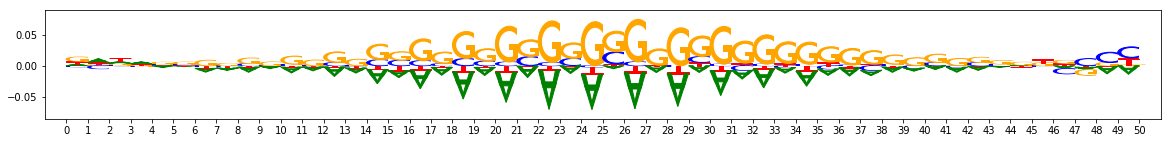

Task 0 actual importance scores:


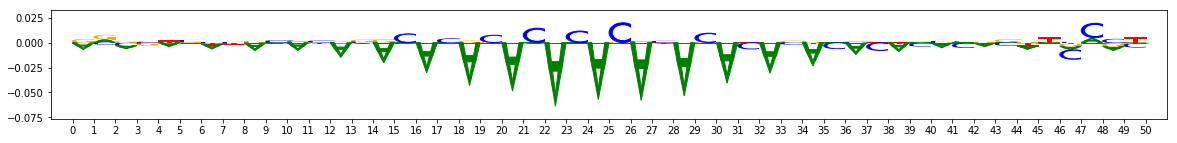

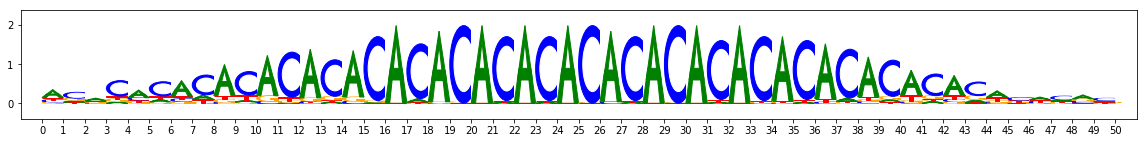

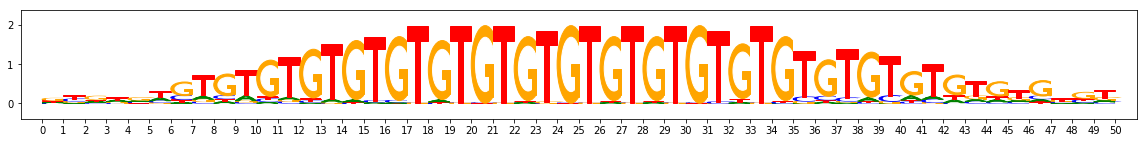

metacluster_1 pattern_9
total seqlets: 49
Task 0 hypothetical scores:


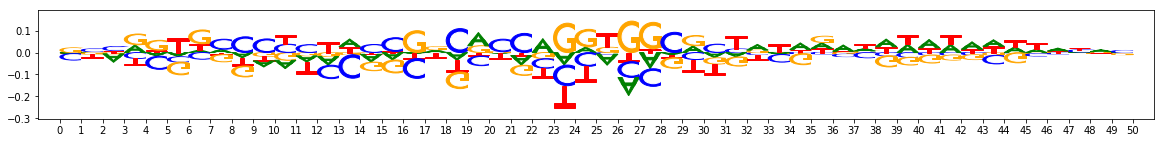

Task 0 actual importance scores:


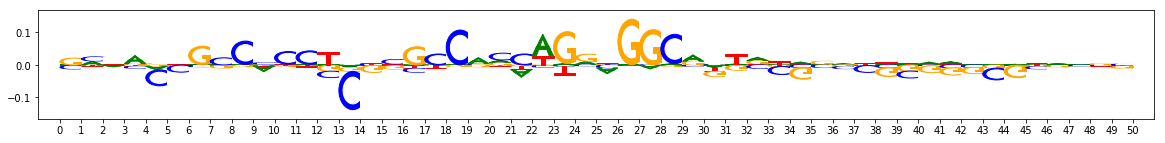

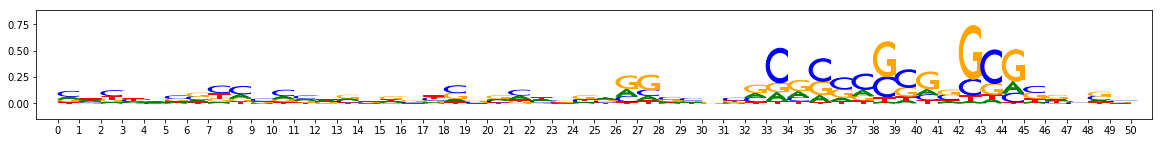

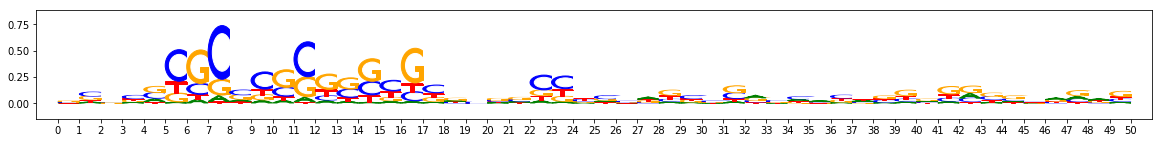

metacluster_1 pattern_10
total seqlets: 48
Task 0 hypothetical scores:


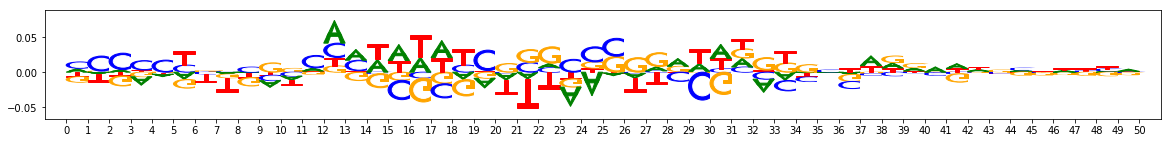

Task 0 actual importance scores:


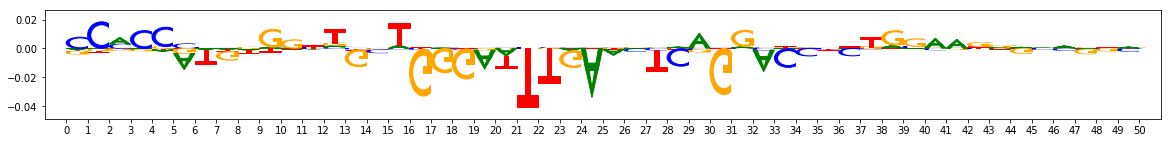

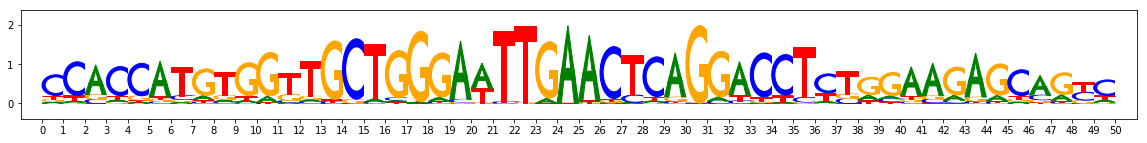

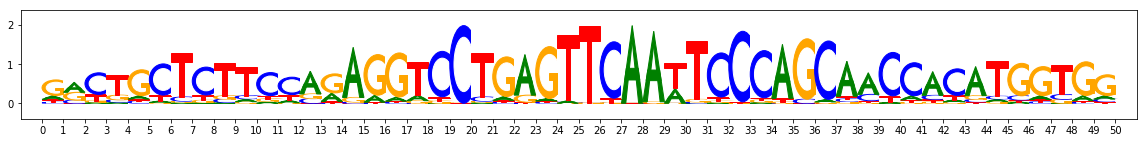

metacluster_1 pattern_11
total seqlets: 32
Task 0 hypothetical scores:


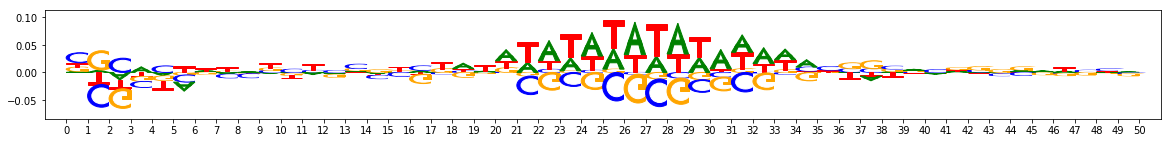

Task 0 actual importance scores:


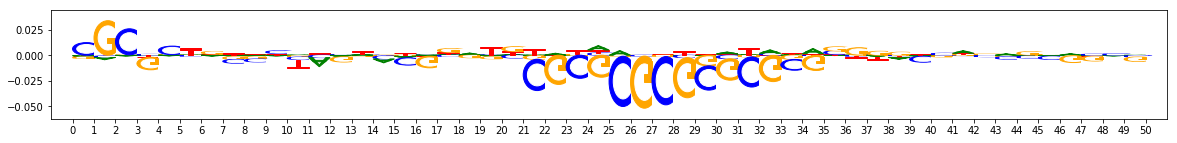

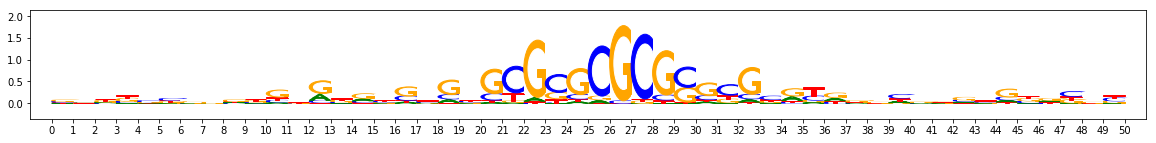

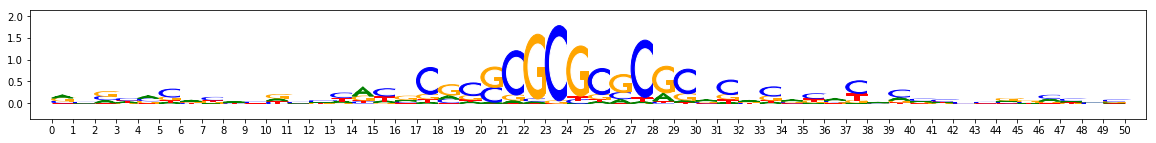

metacluster_1 pattern_12
total seqlets: 31
Task 0 hypothetical scores:


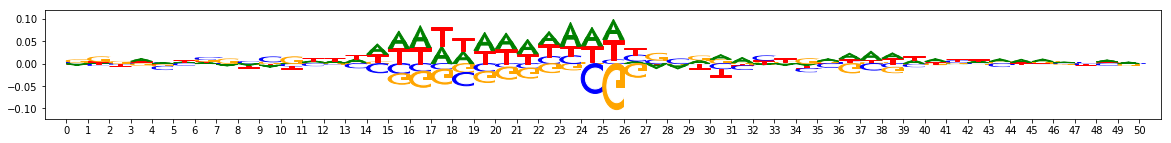

Task 0 actual importance scores:


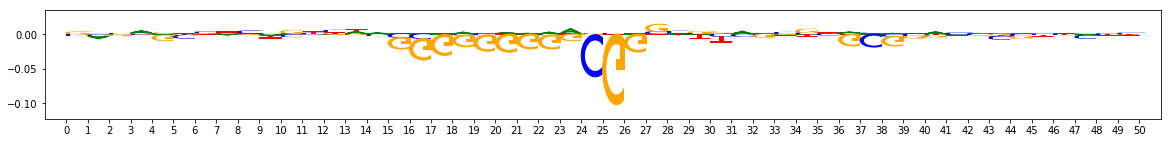

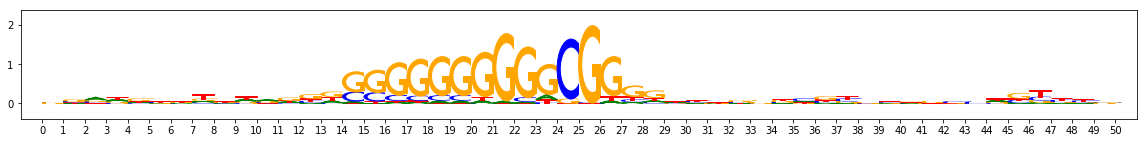

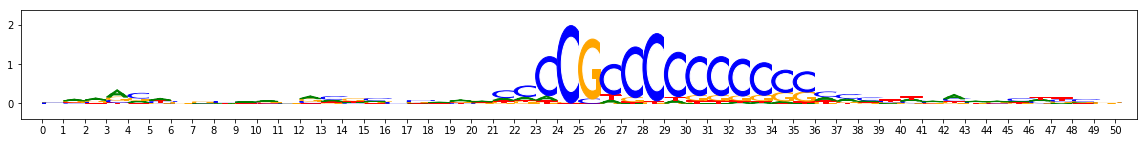

metacluster_1 pattern_13
total seqlets: 24
Task 0 hypothetical scores:


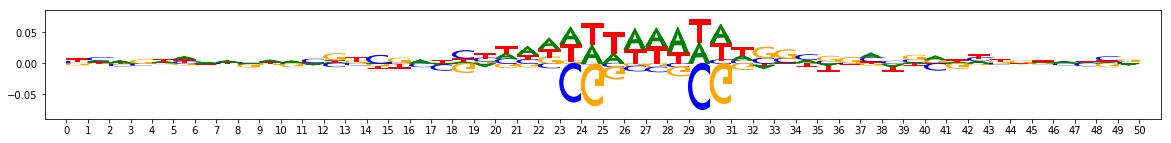

Task 0 actual importance scores:


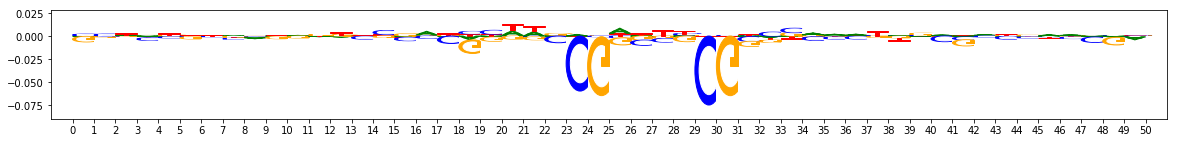

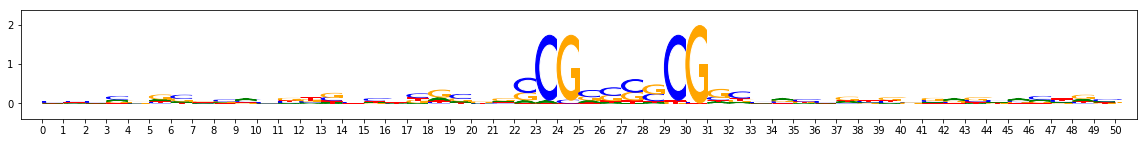

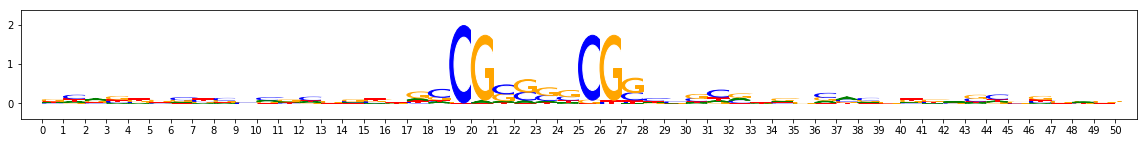

In [2]:
import h5py
import modisco.util
reload(modisco.util)

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("CTCFZF5_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.29, 0.21, 0.21, 0.29])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 2694
Task 0 hypothetical scores:


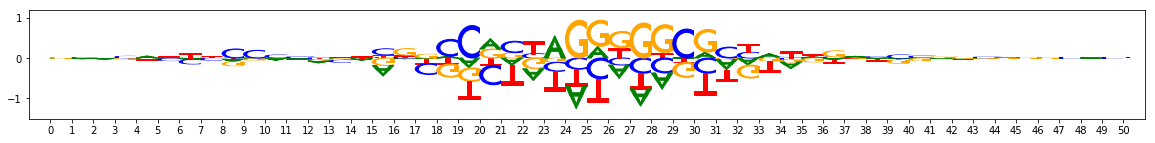

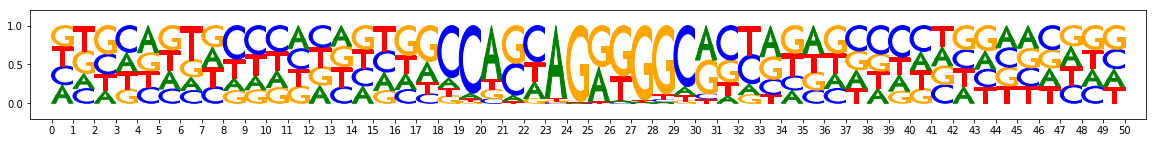

[[ -6.25001446e-03  -1.49592581e-03   6.92098218e-03  -1.89747047e-03]
 [ -1.12866538e-02  -7.31859950e-03   7.06357713e-03   1.86145207e-03]
 [ -1.65372465e-02   2.22812690e-04   6.27253899e-03  -1.07177455e-02]
 [  5.30963577e-03   3.71630215e-02  -2.07250985e-02  -1.32708826e-03]
 [  5.25728723e-02  -1.16860680e-02  -1.23575794e-02  -1.49850985e-02]
 [  1.78761844e-02  -4.81651272e-02  -1.58043155e-02   2.16130378e-02]
 [ -2.84968905e-02  -1.06063909e-01  -1.24010164e-02   1.14995695e-01]
 [ -8.23651843e-03  -4.51185667e-02   1.20890164e-02   3.87094994e-02]
 [ -7.22326181e-02   2.25003394e-01  -9.35324653e-02  -2.61050579e-02]
 [ -1.87706829e-02   1.90914777e-01  -3.10079018e-02  -2.12098031e-03]
 [ -5.84913525e-02   6.09861291e-02   1.28943709e-02  -2.88407873e-03]
 [ -1.83293955e-02   1.83338236e-02   8.70294000e-03  -1.60946730e-02]
 [ -4.99213741e-02  -1.05179363e-02  -3.19945875e-02  -3.14804382e-02]
 [ -1.63187587e-02  -5.00831308e-02  -3.83660567e-02   2.42987530e-02]
 [ -3.

In [3]:
# Get the PFM with the most seqlets

hdf5_results = h5py.File("CTCFZF5_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[0]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.29, 0.21, 0.21, 0.29])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["rev"])
    viz_sequence.plot_weights(pattern["sequence"]["rev"])
    print(np.array(pattern["task0_hypothetical_contribs"]["rev"]))
    print(np.array(pattern["sequence"]["rev"]))
        
hdf5_results.close()